In [3]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/onedollarbw.jpg
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/eyebw.jpg

--2020-10-16 19:58:27--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/onedollarbw.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61584 (60K) [image/jpeg]
Saving to: ‘onedollarbw.jpg’

onedollarbw.jpg     100%[===================>]  60.14K  --.-KB/s    in 0.03s   

2020-10-16 19:58:28 (2.14 MB/s) - ‘onedollarbw.jpg’ saved [61584/61584]

--2020-10-16 19:58:28--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/eyebw.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (ra

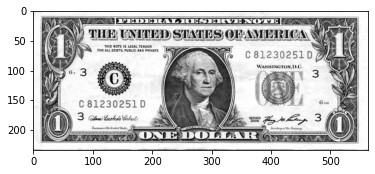

In [4]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
im_read = cv2.imread('onedollarbw.jpg')
onedollarbw = cv2.cvtColor(im_read, cv2.COLOR_BGR2GRAY)
im_read = cv2.imread('eyebw.jpg')
eyebw = cv2.cvtColor(im_read, cv2.COLOR_BGR2GRAY)

plt.imshow(onedollarbw, cmap = 'gray')

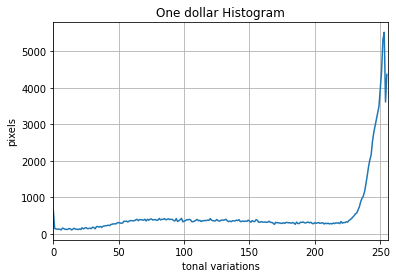

In [5]:
def get_histogram(img, norm=False, plot=False, title=''):
  bins = 256
  hist = np.zeros(bins)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      hist[img[i][j]] += 1

  if norm:
    hist /= (img.shape[0] * img.shape[1])

  if plot:
    plt.figure()
    plt.plot(hist)
    plt.xlim(0, bins)
    plt.title(f'{title} Histogram')
    plt.xlabel('tonal variations')
    plt.ylabel('pixels')
    plt.grid()

  return (hist, bins-1)
hist, bins = get_histogram(onedollarbw, plot=True, title='One dollar')

In [32]:
def slice_image(img, plane=1):
  new_bit_slicing = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] & 2**plane:
        new_bit_slicing[i][j] = 255
      else:
        new_bit_slicing[i][j] = 0

  return new_bit_slicing

Reconstruir la imagen usando los bit plane 8,7,6,5,1

In [63]:
bit_planes = []
for i in range(8):
    bit_planes.append(slice_image(onedollarbw,i))


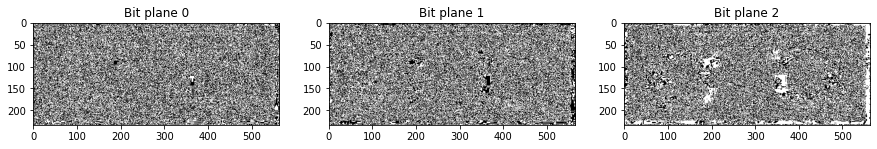

In [80]:
fig=plt.figure(figsize=(15, 10))

col = 0
for i in range(3):
    fig.add_subplot(col+1, 3, i+1)
    plt.imshow(bit_planes[3*col+i], cmap='gray')
    plt.title(f"Bit plane {3*col+i}")

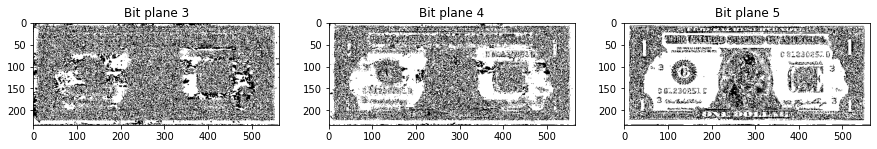

In [84]:
col = 1
fig=plt.figure(figsize=(15, 10))
for i in range(3):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(bit_planes[3*col+i], cmap='gray')
    plt.title(f"Bit plane {3*col+i}")

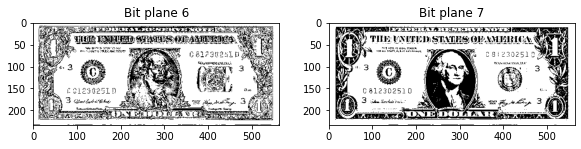

In [86]:
col = 2
fig=plt.figure(figsize=(15, 10))
for i in range(2):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(bit_planes[3*col+i], cmap='gray')
    plt.title(f"Bit plane {3*col+i}")

Text(0.5, 1.0, 'Original')

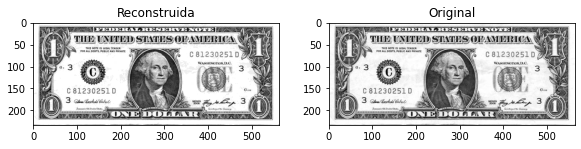

In [115]:
bp_to_use = [8-1,7-1,6-1,5-1,1-1]
reconstruct = np.zeros_like(bit_planes[0])
reconstruct = reconstruct.astype(np.float64)
for bp in bp_to_use:
    reconstruct += bit_planes[bp].astype(np.float64)*(2**(bp))/255.0
reconstruct = reconstruct.astype(np.int64)

fig=plt.figure(figsize=(15, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(reconstruct, cmap='gray')
plt.title("Reconstruida")
fig.add_subplot(col+1, 3, i+1)
plt.imshow(onedollarbw, cmap='gray')
plt.title("Original")


# Punto 6

## imagen original

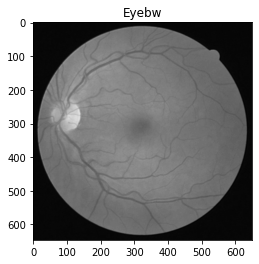

In [11]:
_ = plt.imshow(eyebw, cmap='gray', vmin=0, vmax=255)
_ = plt.title("Eyebw")

# imagen log transformed

C = 30

30


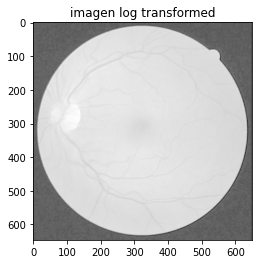

In [12]:
img = eyebw.copy().astype(np.float64)

# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
c = 30
print(c)
log_transformed = c * np.log(1 + img)
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 

_ = plt.imshow(log_transformed, cmap='gray', vmin=0, vmax=log_transformed.max())
_ = plt.title("imagen log transformed")

53


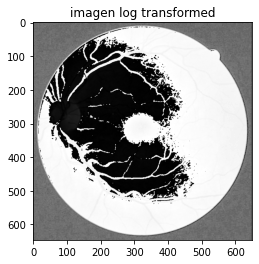

In [13]:
img = eyebw.copy().astype(np.float64)

# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
c = 53
print(c)
log_transformed = c * np.log(1 + img)
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 

_ = plt.imshow(log_transformed, cmap='gray', vmin=0, vmax=log_transformed.max())
_ = plt.title("imagen log transformed")

55


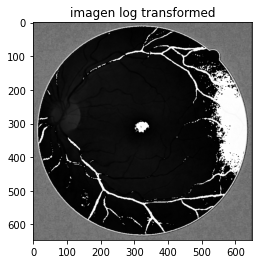

In [14]:
img = eyebw.copy().astype(np.float64)

# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
c = 55
print(c)
log_transformed = c * np.log(1 + img)
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 

_ = plt.imshow(log_transformed, cmap='gray', vmin=0, vmax=log_transformed.max())
_ = plt.title("imagen log transformed")

80


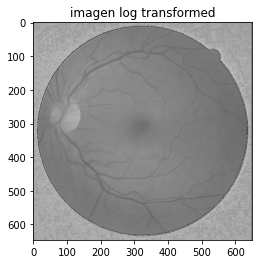

In [15]:
img = eyebw.copy().astype(np.float64)

# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
c = 80
print(c)
log_transformed = c * np.log(1 + img)
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 

_ = plt.imshow(log_transformed, cmap='gray', vmin=0, vmax=log_transformed.max())
_ = plt.title("imagen log transformed")

90


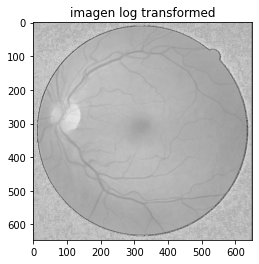

In [16]:
img = eyebw.copy().astype(np.float64)

# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
c = 90
print(c)
log_transformed = c * np.log(1 + img)
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 

_ = plt.imshow(log_transformed, cmap='gray', vmin=0, vmax=log_transformed.max())
_ = plt.title("imagen log transformed")

105


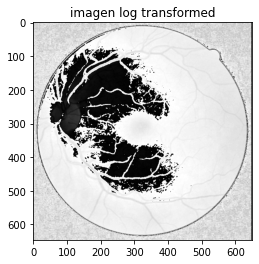

In [17]:
img = eyebw.copy().astype(np.float64)

# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
c = 105
print(c)
log_transformed = c * np.log(1 + img)
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 

_ = plt.imshow(log_transformed, cmap='gray', vmin=0, vmax=log_transformed.max())
_ = plt.title("imagen log transformed")

## Gamma transformation

In [18]:
import cv2 
import numpy as np 
  
# Open the image. 
img = eyebw.copy().astype(np.float64)
  
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
    # Save edited images. 
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 

Gamma 0.1

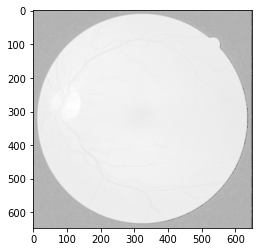

In [19]:
im_read = cv2.imread('gamma_transformed'+str(0.1)+'.jpg')
eyegamma = cv2.cvtColor(im_read, cv2.COLOR_BGR2GRAY)
plt.imshow(eyegamma, cmap = 'gray')

Gamma 0.5

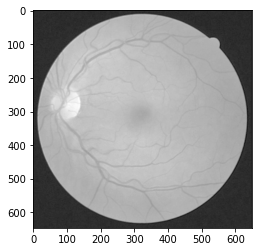

In [20]:
im_read = cv2.imread('gamma_transformed'+str(0.5)+'.jpg')
eyegamma = cv2.cvtColor(im_read, cv2.COLOR_BGR2GRAY)
plt.imshow(eyegamma, cmap = 'gray')

Gamma 1.2

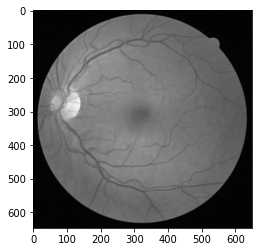

In [21]:
im_read = cv2.imread('gamma_transformed'+str(1.2)+'.jpg')
eyegamma = cv2.cvtColor(im_read, cv2.COLOR_BGR2GRAY)
plt.imshow(eyegamma, cmap = 'gray')

Gamma 2.2

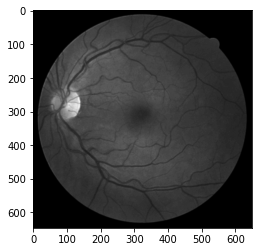

In [22]:
im_read = cv2.imread('gamma_transformed'+str(2.2)+'.jpg')
eyegamma = cv2.cvtColor(im_read, cv2.COLOR_BGR2GRAY)
plt.imshow(eyegamma, cmap = 'gray')

## Contrast stretched

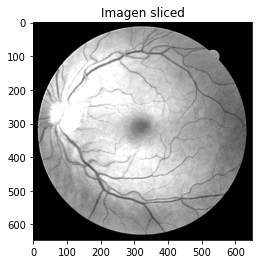

In [23]:
import cv2 
import numpy as np 
  
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
  
# Open the image. 
img = eyebw.copy().astype(np.float64)
  
# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
  
_ = plt.imshow(contrast_stretched, cmap='gray', vmin=0, vmax=255)
_ = plt.title("Imagen sliced")

## Conclusion: en el que mejor se resaltan las venas es con el contrast stretched

## Punto 7

In [116]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/HDR%20images/office_1.jpg
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/HDR%20images/office_2.jpg
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/HDR%20images/office_3.jpg
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/HDR%20images/office_4.jpg
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/HDR%20images/office_5.jpg
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/HDR%20images/office_6.jpg

--2020-10-16 20:48:02--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/HDR%20images/office_1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60155 (59K) [image/jpeg]
Saving to: ‘office_1.jpg’

office_1.jpg        100%[===================>]  58.75K  --.-KB/s    in 0.03s   

2020-10-16 20:48:03 (2.16 MB/s) - ‘office_1.jpg’ saved [60155/60155]

--2020-10-16 20:48:03--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP4%20-%20Procesamiento%20en%20dominio%20espacial/Imagenes%20para%20el%20TP/HDR%20images/office_2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [117]:
images = []
for i in range(6):
    im_read = cv2.imread('office_'+str(i+1)+'.jpg')
    images.append(im_read)
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

In [118]:
times = np.array([0.0333, 0.1000, 0.3333, 0.6250, 1.3000, 4.0000] , dtype=np.float32)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)


In [119]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
cv2.imwrite("hdrDebevec.jpg", hdrDebevec)


True

In [120]:
#createTonemapDrago(gamma = 1.0,saturation = 1.0,bias = 0.85)

tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)


True

## La imagen se guardo como "ldr-Drago.jpg"